# <center>Aston University <br/><br/> CS3IVP: Digital Image and Video Processing <br/><br/> Lab 02: Image I/O and Python functions</center>

Lecturers:<br/>
Debaleena Roy <a href="mailto:d.roy@aston.ac.uk">d.roy@aston.ac.uk</a> <br/>
Office: MB265K <br/>

Martin Rudorfer <a href="mailto:m.rudorfer@aston.ac.uk">m.rudorfer@aston.ac.uk</a> <br/>
Office: MB214G <br/>

## Goals
By the end of this session, you should know:
1. how to load and display colour and grayscale images in Jupyter,
2. how to plot (sampled) functions,
3. how to write and use Python functions,


## Instructions
No submission is required for this laboratory.

## Image I/O using SciKit-Image

Before we start using Python to process images, we need to know how to load and display them. In most labs, you can work with images of your choice, but we are going to start with some standard test images. Download the two sample images available from Blackboard (from the same location as this notebook) and save them in the same folder as the notebook.

To load, save and display images -among other tasks- we are going to use a Python module called [**scikit-image**](https://scikit-image.org/).
To load an save images we are going to use the submodule `io`. We can either import the module or just the functions we are interested in:

In [5]:
# We are going to import individual functions
from skimage.io import imread, imsave, imshow

# But we could have imported the whole skimage.io module.
# import skimage.io

We can load images using the following syntax: `image = imread(path)`, where `path` is the location of the image in the file system (e.g., "C:\some\directory\image.png", "image.png") and `image` is the name of the variable where you want to load the image. Please remember that `path` must be a string (**do not forget the quotes**).

In [6]:
image = imread("airplane.bmp")

Similarly, we can save an image matrix using the following syntax: `imsave(path, image)`, where the parameters have similar semantics:

In [7]:
imsave('airplane-copy.png', image)

Make sure that you have run all the previous cells. You will see that the file `airplane-copy.png` has been created. In this module, we will generally prefer loseless image file formats such as BMP or **PNG**. The JPG image file format is great for photographs but, as we will see later in the module, the quality of the images can decrease significantly.

## Task 2.1
- Load the two test images, `airplane.bmp` and `camera.bmp`, assigning them to appropriately named variables.
- In scikit-image, images are represented as numpy arrays. Using what you've learned in the previous lab, print out the main characteristics of both images:
    - Number of dimensions  vitushan
    - Shape - rows and columns
    - Type of the elements within the matrices
- What similarities and differences can you see? Take a few seconds to reflect on them and the possible implications.

In [8]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

airplane = imread("airplane.bmp")
camera = imread("camera.bmp")

print (f' airplane.ndim is:{airplane.ndim}')
print (f' airplane.shape is:    {airplane.shape}')
print (f' airplane.dtype is:    {airplane.dtype}')
print (f' camera.ndim is:   {camera.ndim}')
print (f' camera.shape is:  {camera.shape}')
print (f' camera.dtype is:  {camera.dtype}')

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

 airplane.ndim is:3
 airplane.shape is:    (256, 256, 3)
 airplane.dtype is:    uint8
 camera.ndim is:   2
 camera.shape is:  (256, 256)
 camera.dtype is:  uint8


- Both images have 256 rows and 256 columns. This means that they are of size 256 by 256 pixels.

- Both images are of data type uint8 - that is unsigned 8-bit integers. This is the *de facto* standard datatype for bitmap images.

- The matrix holding the airplane image (`airplane.bmp`) has three dimensions (256x256x3 as opposed to 256x256). Intuitively, we can think of this as 3 images (referred to as *planes*) of 256 by 256 pixels. When we see an image of this shape, we can usually assume that it is a colour image (here we have an RGB image with one plane for red, one plane for green and one for blue). Conversely, `camera.bmp` has a single plane. Although it is very likely to be the case, we cannot assume that this means that it is a grayscale image (palette colour images may also have a single plane - we will learn about palette colour images later in the module).


We can display any image using the `imshow` function that we imported earlier. It receives a single parameter, the image to display. If you make more than one call to `imshow` in the same cell, and forget to take measures to avoid it, you will only get the last image.

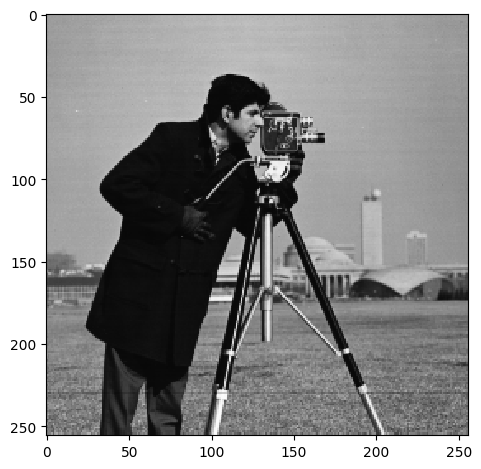

In [9]:
# We are using a semicolon in the last line to suppress the textual output
imshow(airplane)
imshow(camera);

The image `camera.bmp` is indeed a greyscale image.

If you want to display more than one image in a single cell we need to import `PyPlot` (generally as `plt`), the module that scikit-image uses underneath to display images and create additional figures. We are going to use its `figure` function to create an additional figure between the different calls to `imshow`.

As you can see, in Python there is a lot of interaction between different modules. Look at the following example where two images are displayed:

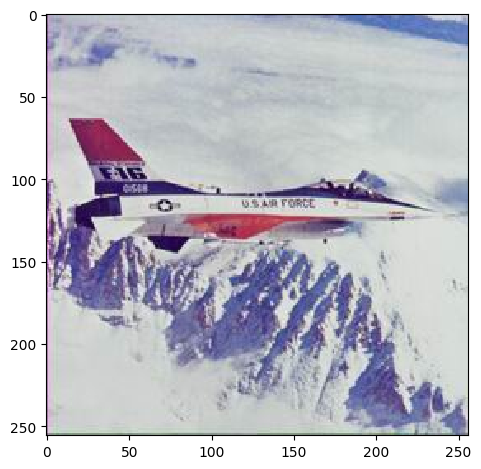

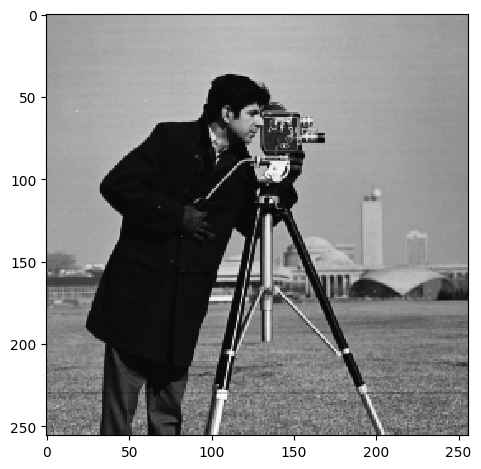

In [10]:
import matplotlib.pyplot as plt

imshow(airplane)

plt.figure()
imshow(camera);

We will be working with grayscale images for the first half of the module. If you want to use your own colour images in a lab that requires grayscale images, you will need to convert them to greyscale first.

We can convert an RGB image `img` into grayscale using the *scikit-image* function `rgb2gray` provided in the module `skimage.color`. It receives an RGB image as a single parameter and returns a grey image.

A valid use of the function would be: `grey_image = rgb2gray(colour_image)`.

## Task 2.2
Try the following:
1. Convert the `airplane` image into greyscale.
2. Save it to disk as a PNG file, using the filename: `airplane-grey.png`.
3. Display it as a (greyscale) image in the notebook.

In [11]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)
import numpy as np
from skimage.color import rgb2gray

airplane = imread("airplane.bmp")
print(airplane.dtype)

airplane_grey = rgb2gray(airplane)
print(airplane_grey.dtype)
imsave('airplane-grey.png', airplane_grey)  # this gives an error: "cannot write mode F as BMP", see explanation below
imshow(airplane_grey);

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

uint8
float64


OSError: cannot write mode F as PNG

## Task 2.3
Depending on your version of scikit-image, you may have noticed an error: **cannot write mode F as PNG**. The function `rgb2gray` converts the image to greyscale so that the brightness values range from $0$ to $1$, using floating point numbers (mode F). To convert the image into the format we will usually work with, we will need to make the brightness values range from $0$ to $255$ using 8-bits unsigned integers.

Modify your previous code to convert the image into 8-bits integers in the range $(0-255)$. You will need to use the operator `*` and convert the underlying array datatype using the method `astype` of the numpy array to convert. If you have gotten the error earlier, you should now be able to save the image.

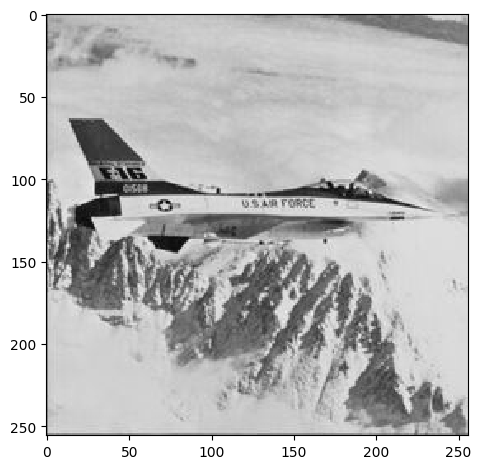

In [ ]:
import numpy as np
from skimage.color import rgb2gray

# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

airplane = imread("airplane.bmp")
airplane_grey = (rgb2gray(airplane)*255).astype(np.uint8)   # first multiply by 255, then convert to 8-bit unsigned integer
imsave('airplane-grey.png', airplane_grey)   # this works fine now!
imshow(airplane_grey);

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## Plotting functions
We will sometimes want to visualise numerical data in the form of a graph (generally 1-dimensional signals). To plot sampled functions we are going to use `matplotlib`, the module that we mentioned earlier when we covered how to output multiple figures:

In [ ]:
import matplotlib.pyplot as plt

Plotting in Python notebooks is straightforward. Assume that we have two vectors of the same length, `x` and `y`, that we want to plot against each other. The only thing we need to do is to call `plt.plot` and pass two parameters:
1. the input domain of the function we want to plot,
2. its corresponding output values.

For instance, as in the following example, `plt.plot(x, y)`:

Length of the input vector: 63.


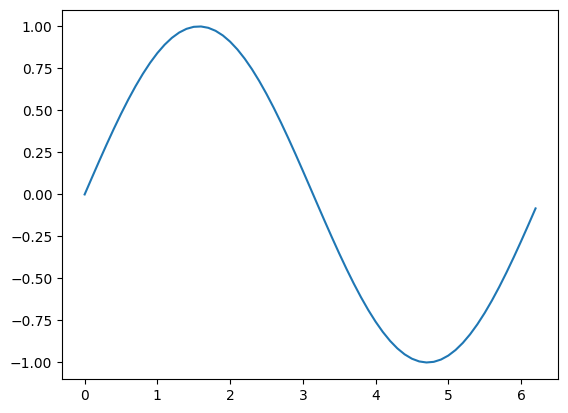

In [ ]:
# Generate the numbers from 0 to 2pi, with a step of 0.1
x = np.arange(0, 6.28, 0.1)

# Print the number of elements in x, just so that you can see that the values
# are independent from the number of elements.
print(f'Length of the input vector: {len(x)}.')

# Compute output for the function   y = sin(x)
y = np.sin(x)

# Plot the results
plt.plot(x, y);

**Notice that we used the function `np.arange` in the previous cell**. Use it in the next exercises.

## Task 2.4.a
Plot the following function:
- $y = x$ for $x$ in the range $[0, 10)$, with a step of $1$

x: [0 1 2 3 4 5 6 7 8 9]
y: [0 1 2 3 4 5 6 7 8 9]


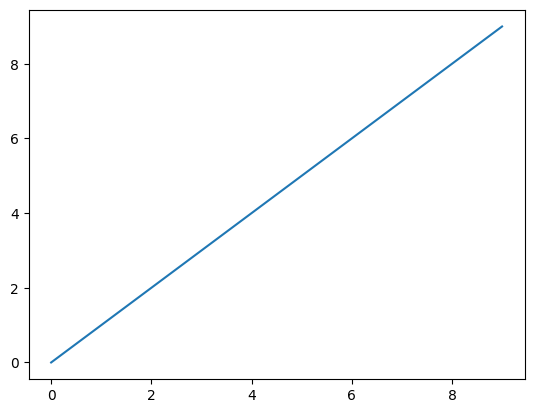

In [ ]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

# Generate the numbers from 0 to 10, with a step of 1
x = np.arange(0, 10, 1)
print('x:', x)  # check that we got it right

# Compute output for the function and plot the results
y = x
print('y:', y)
plt.plot(x, y);

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## Task 2.4.b
Plot the following function:
- $y = -x$ for x in the range $[0, 10)$, with a step of 1

x: [0 1 2 3 4 5 6 7 8 9]
y: [ 0 -1 -2 -3 -4 -5 -6 -7 -8 -9]


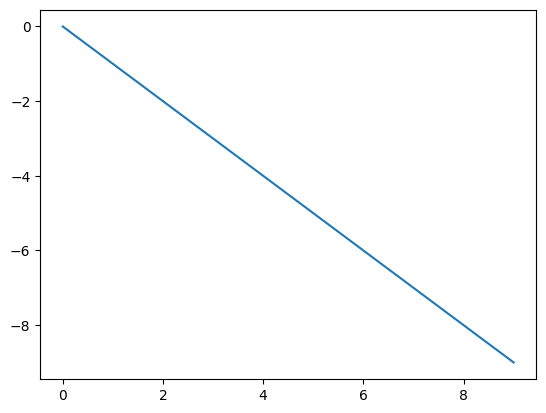

In [ ]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)
x = np.arange(0, 10, 1)
print('x:', x)

y = -x
print('y:', y)

plt.plot(x, y);
# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## Task 2.4.c
Plot the following function:
- $y = x^2$ for x in the range $[0, 10)$, with a step of 5.


For exponentiaiton we can use the ```**``` operator or `np.power`.

x: [0 5]
y: [ 0 25]


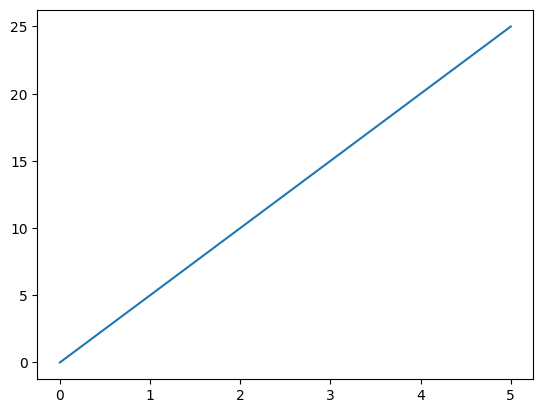

In [ ]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)
x = np.arange(0, 10, 5)
print('x:', x)

y = x**2
print('y:', y)

plt.plot(x, y);

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## Task 2.4.d
Plot the following function:
- $y = x^2$ for x in the range $[0, 10)$, with a step of 0.01


x: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.

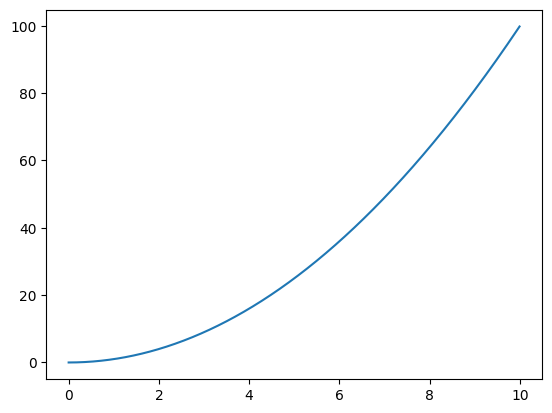

In [ ]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

x = np.arange(0, 10, 0.01)
print('x:', x)

y = x**2
print('y:', y)

plt.plot(x, y);
# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

We can also plot two pairs of vectors of the same length, `x1` and `y1`, `x2` and `y2`, on the same axes using similar syntax (remember to call `plt.figure()` if you need to plot more than one figure in the same cell):

`plot(x1, y1, x2, y2)`

Finally, it is good practice to label your graphs to make their content clear. The commands title, xlabel, ylabel and legend allow us to do this. You can check the [**matplotlib reference**](https://matplotlib.org/stable/api/index) to see all commands, their description and usage examples. You can also use Matlab’s help documentation or see the “Introduction to Matlab” slides for example usage of these commands.

Text(0.5, -0.05, 'The calculations for the falling object do not consider friction.')

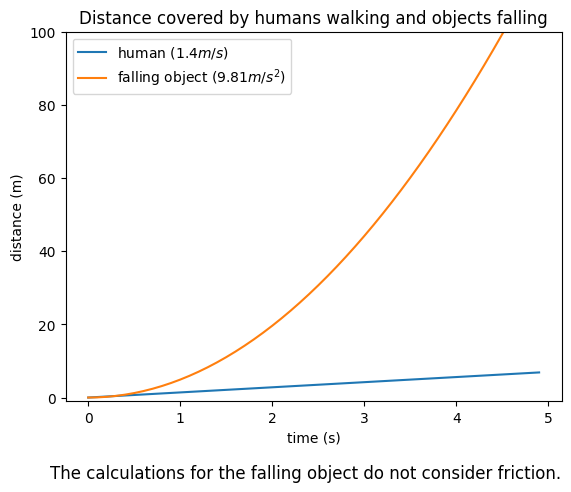

In [ ]:
# Generate the numbers from 0 to 10, with a step of 1
x = np.arange(0, 5, 0.1)

# Compute output for two functions
y1 = x * 1.4
acceleration = 9.81 # 9.81m/s^2
y2 = 1./2. * acceleration * np.power(x, 2)

# Plot the results
plt.plot(x, y1, x, y2)

# Set title, limits, labels and legend
plt.title('Distance covered by humans walking and objects falling')
# plt.xlim([0, 10])
plt.ylim([-1, 100])  # If we comment the line, pyplot automatically assigns the limits
plt.ylabel('distance (m)')
plt.xlabel('time (s)')
plt.legend(['human ($1.4 m/s$)', 'falling object ($9.81m/s^2$)'])
plt.figtext(0.5, -0.05, "The calculations for the falling object do not consider friction.", wrap=True, horizontalalignment='center', fontsize=12)

## Creating and using functions
A function is a re-usable piece of code which can operate on global and user provided data (arguments), and **can** return values when its execution terminates. Not every function has to provide a return value. Functions follow the syntax:
```
def function_name (parameters):
    code
```
where `function_name` is the name of the function and `parameters` is a parameters' list.

For instance, the following function, opens an image and returns its greyscale version if it's not in greyscale to begin with:

In [12]:
def load_in_greyscale(image_path):
    read_image = imread(image_path)
    print (read_image.ndim)
    if read_image.ndim == 2:
        return read_image
    elif read_image.ndim == 3:
        return (rgb2gray(read_image)*255.).astype(np.uint8)
    else:
        raise Exception('Image in unknown colour format!')

To call the our functions we need to run the cells where they have been written, and then call them wherever needed. This can be done in the same cell after the function definition, or in later cells.

3


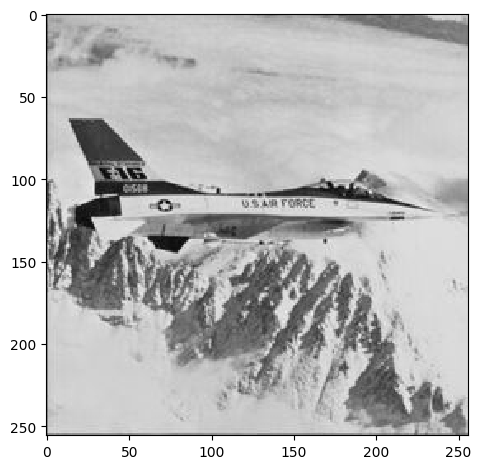

In [13]:
img = load_in_greyscale('airplane.bmp')
imshow(img);

## Task 2.5
A normalised vector is one whose norm (the square root of the sum of each of its elements squared) is $1$. To normalize a vector, we divide each element by the vector's current norm. To get the norm of a NumPy vector we use the function `np.linalg.norm(x)`. For instance, `norm_x = np.linalg.norm(x)`

Attempt to write a function `normalise_vector` and compare it to the sample implementation at the bottom of the notebook (try to complete your attempt before looking ahead!). For reference, the following call:
```
initial = np.array([3., 4.])
normalised = normalise_vector(initial)
print(normalised)
```
should produce a result of:
```[0.6 0.8]```


In [14]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

def normalise_vector(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

initial = np.array([3., 4.])
normalised = normalise_vector(initial)
print(normalised)

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

[0.6 0.8]


## Consolidating understanding and measuring execution time
You should now be familiar with the **basic Python syntax** (variables, conditionals, loops and functions) and with most **relevant modules** (NumPy and SciKit-image).

Complete the following tasks to test and consolidate your understanding. Note that in some cases you may have to refer to the previous labs or online documentation.

## Task 2.6
The following function takes a single parameter `K` and returns a vector containing the values of the equation $y = x*cos(x)-sin(π)$ for each integer in the range 1:K.

In [15]:
from math import pi

def loop_based_fn(K):
    ret = np.zeros((1,K))
    for i in range(K):
        ret[0,i] = i*np.cos(i) - np.sin(pi)
    return ret

print(f'Example: {loop_based_fn(10)}')

Example: [[-1.22464680e-16  5.40302306e-01 -8.32293673e-01 -2.96997749e+00
  -2.61457448e+00  1.41831093e+00  5.76102172e+00  5.27731578e+00
  -1.16400027e+00 -8.20017236e+00]]


Use your knowledge of Python to write an equivalent `vectorised_fn` function without loops.

In [16]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

def vectorised_fn(K):
    ret = np.arange(K).reshape(1, K)  # first fill values, then reshape the vector to (1, K) to match the shape from the loop-based fn
    ret = ret * np.cos(ret) - np.sin(pi)
    return ret

print(f'Example: {vectorised_fn(10)}')

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

Example: [[-1.22464680e-16  5.40302306e-01 -8.32293673e-01 -2.96997749e+00
  -2.61457448e+00  1.41831093e+00  5.76102172e+00  5.27731578e+00
  -1.16400027e+00 -8.20017236e+00]]


## Task 2.7
We have claimed that vector-based functions in Python are typically faster that their loop-based counterparts. In this task we will try to validate this measuring the execution time. We are going to use the function `time` within the `time` module *i.e.*, `time.time()`. The function returns a *timestamp* (the number of seconds since a point in time in the past -- January 1st 1970).

See the following example:

In [23]:
import time

print(f'Number of seconds since January 1st 1970: {time.time()}')

Number of seconds since January 1st 1970: 1759928048.0323446


This allows us to measure the time spent in a code block:

In [24]:
print('Sleeping for 5 seconds...', end=' ')

timestamp_a = time.time()
time.sleep(5)
timestamp_b = time.time()

print('done')
time_difference = timestamp_b - timestamp_a
print(f'That took {time_difference} seconds.')


Sleeping for 5 seconds... done
That took 5.002467632293701 seconds.


Your task is to measure the time spent by the functions `loop_based_fn` and `vectorised_fn` (your vectorised version) for an input value of 1000000.

In [25]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

n = 1000000

start_time_loop = time.time()
loop_based_fn(n)
stop_time_loop = time.time()
print(f'Loop-based function took {stop_time_loop-start_time_loop:.4f} seconds for n={n}')

start_time_loop = time.time()
vectorised_fn(n)
stop_time_loop = time.time()
print(f'Vectorised function took {stop_time_loop-start_time_loop:.4f} seconds for n={n}')

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)timestamp_a = time.time()

Loop-based function took 3.7674 seconds for n=1000000
Vectorised function took 0.0283 seconds for n=1000000


Even though the difference in absolute terms is not that big -under two seconds in my computer- the ratio is considerable.

There are more sophisticated ways to measure the time taken by algorithms, but it is out of the scope of the module. For those interested in the topic, please refer to the documentation of the `timeit` module: https://docs.python.org/3/library/timeit.html.

## End of Lab 02
Below you can find the solutions for the tasks, please do not look at them unless you really need help.

## Sample solutions

In [ ]:
# Task 2.5
def normalise_vector(v):
    ret =  v / np.linalg.norm(v)
    return ret

initial = np.array([3., 4.])
normalised = normalise_vector(initial)
print (normalised)

**Extra:** Can you think of a special case that would need to be treated in this function? How would you incorporate this?